# Feature Extraction & Price Prediction for Mobile Phone

- This project identifies key factors influencing mobile phone prices using data-driven feature selection and builds predictive models to estimate prices accurately. Insights gained support strategic pricing and targeted marketing decisions.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Importing the libraries needed for our project.- 
Panda-- To work with sheets, csv/excel files, functions for data manipulation
-  Nup-y- To perform mathematical and numerical funtions- 
-  Matplol-ib- To create charts and plots for visualization with more customizable option- s
-  Seb-orn- To create charts and plots easily with inbuilt functions


In [94]:
data= pd.read_excel("C:/NextHikes Solutions/Feature Extraction and Price Prediction for Mobile Phones/Processed_Flipdata.xlsx")

- Loading the file- Loading data in tabular form or excel/csv file using Pandas library.

In [95]:
print(data)

     Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camer

- print- Shows the overall dataset- prints column names and few top and bottom rows data.- 
Dataset has total121 columns(Categorical & Numerical).- 
Dataset has information such aModel, Colour, Memory, RAM, Battery, Cameraty etc.

In [98]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


- head- Prints the top 5 rows of the data with column names.

In [97]:
data.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,15999


- tail- Prints last 5 rows of the data with column names.

In [99]:
data.shape

(541, 12)

- shape- Prints the total number of datapoints- (Total number of rows, Total number of columns)
- The dataset has 541 rows and 12 columns. 

In [100]:
data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

- columns- Prints the names of all the columns available in the dataset.- 
The names of al 120 columns are printed with datatype object of the dataset.

In [101]:
data.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

- dtypes- Prints the datatype of each column along with column name.- 
Datatype of the whole dataset is object if datatype of any one of the column is objece.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


- info- Prints the datatype and total non-null values of each column with column names.- 
Also prints the total number of columns in each datatypes-  . In al 12 columns,ne, 1 column is of float datatyp36, 7 columns are of integer datatypna45d 1 umncols  is of object datatype.

In [103]:
data= data.drop('Unnamed: 0', axis=1)
data= data.drop('Model', axis=1)

- drop- drops a particular column or row from the dataset.- 
Column 'Unnamed: 0' is dropped from the dataset as it has no significance for the analysis
- Column 'Model' is dropped as it has no significance in price prediction and hinderance in model development..

In [104]:
data.shape

(541, 10)

- Dataset has 10 columns in total now after dropping 2 columns.

In [114]:
data.head()

,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


- Top datapoint after dropping columns.

In [105]:
data.isnull().sum()

Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

- isnull().sum()- Prints the total number of null values in each columns along with the name of the columns.
- There are no null values in any columns.

In [106]:
data.duplicated().sum()

13

- duplicated().sum()- Prints the total number of rows with same datapoints in all columns.- 
Thereare 13o duplicate rows in the dataset.

In [107]:
data = data.drop_duplicates()

- Dropped the duplicate rows from the dataset.

In [108]:
data.shape

(528, 10)

- Dataset has 528 rows and 10 columns after dropping the duplicates.

In [109]:
data.duplicated().sum()

0

- There are no duplicate rows now in the dataset.

In [110]:
data.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,111.181818,5.409091,4873.160985,0.064394,16.449678,16341.609848
std,60.942604,1.994126,768.000684,0.245686,2.501331,10867.396664
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9334.250000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13999.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19422.500000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


- describe- Prints the central tendency and total count of continuous columns.
- Memory- Average memory of th mobile phones is 111GB with minimum memory 16GB and maximum memory 256GB.
- RAM- Average RAM of the phones is 5.4GB with minimum RAM 2GB and Maximum RAM 8GB.
- Battery- Average battery capacity is 4873 mAh with minimum battery capacity 800 mAh and maximum battery capacity 7000 mAh.
- Mobile Height- Average height of the mobile phones is 16.44mm with minimum height 4.5mm and maximum height 41.9mm.
- Price- Average price of mobile phones is Rs 16341.6 with minimum price Rs 920 and maximum price Rs 80999.

In [111]:
data= data.rename(columns={'Prize' : 'Price'})

- rename- Renames the name of the columns.
- Column name of 'Prize is changed to 'Price'.

In [112]:
data.columns

Index(['Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera',
       'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

- Name of all the columns after renaming.

In [113]:
data.nunique()

Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Price            158
dtype: int64

- nunique- Prints the total number of unique values in all columns with respective column names.

In [115]:
data_encoded = pd.get_dummies(data, columns=['Colour', 'Processor_'], drop_first=True)

- get_dummies- Converts categorical columns into binary. Every data point is created with a new column with value of itself as True and all others as False.
- One Hot Encoding- Colour and Processor are converted into binary and dummy columns are created.

In [116]:
data_encoded

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Price,Colour_Agate Black,Colour_Alpine White,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,64,4,6000,13MP,5MP,1,16.76,7299,False,False,...,True,False,False,False,False,False,False,False,False,False
1,64,4,6000,13MP,5MP,1,16.76,7299,False,False,...,True,False,False,False,False,False,False,False,False,False
2,128,8,5000,50MP,16MP,0,16.64,11999,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,2,5000,8MP,5MP,0,16.56,5649,False,False,...,False,False,False,False,False,False,False,False,False,False
4,128,8,5000,50MP,5MP,1,16.76,8999,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50MP,12MP,0,15.49,79999,False,False,...,False,False,False,False,False,False,False,False,False,False
537,32,2,3100,5MP,2MP,0,12.70,5998,False,False,...,False,False,False,False,False,False,False,False,False,False
538,64,4,5000,50MP,8MP,0,16.76,9990,False,False,...,False,False,False,False,False,False,False,False,False,False
539,128,8,5000,50MP,32MP,0,16.26,38999,False,False,...,False,False,False,False,False,False,False,False,False,False


- Dataset has 528 rows as before but columns have increased to 404 because of dummy creation.

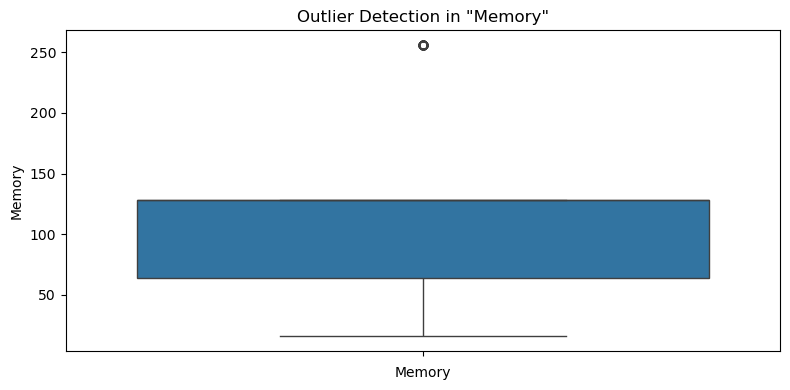

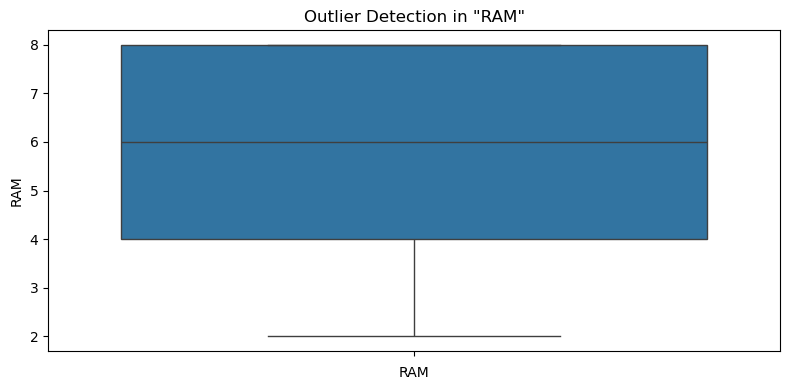

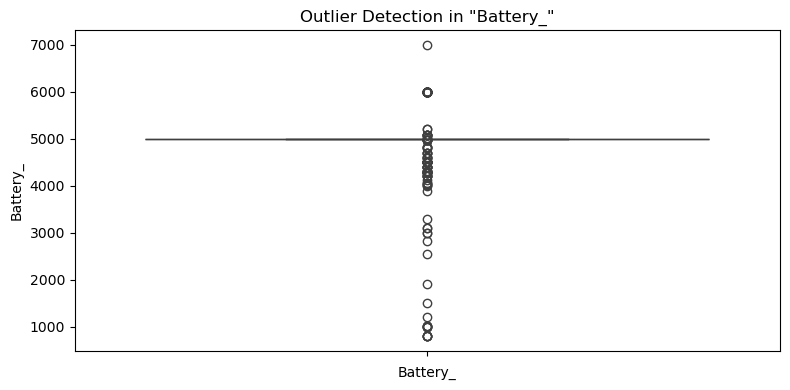

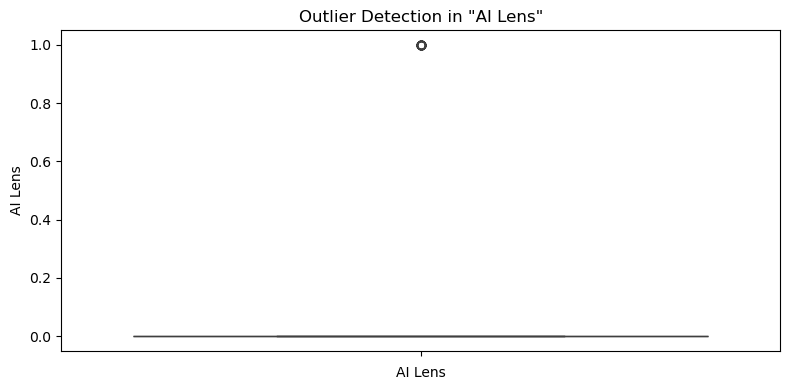

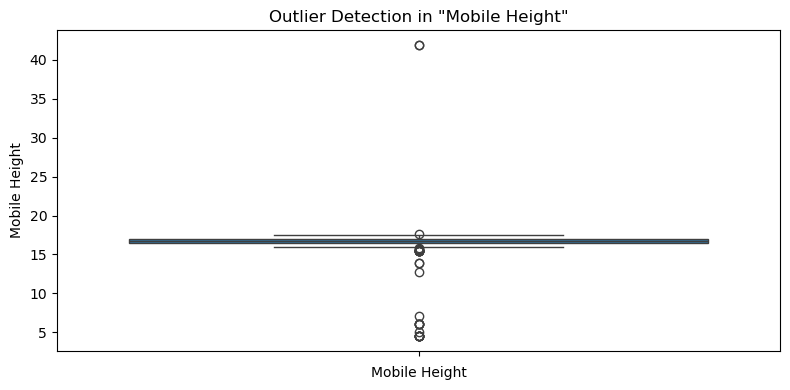

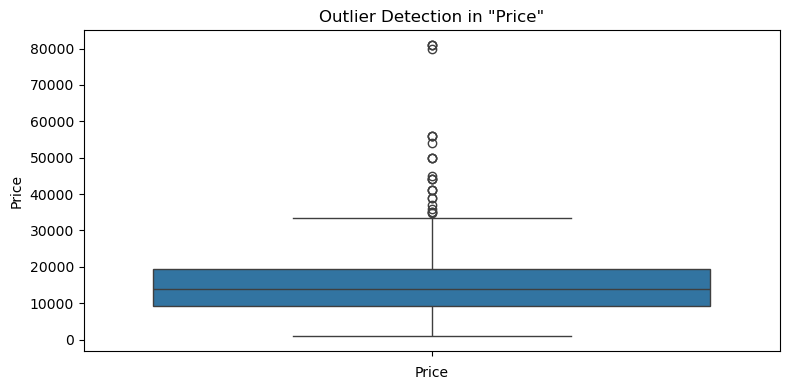

In [117]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Outlier Detection in "{col}"')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

- Outlier- Values or Datapoints in columns which are lot higher or lot lower values than usual values of that particular column.
- Boxplot shows outliers in all numerical columns.

In [118]:
outlier_counts = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Memory: 55 outliers
RAM: 0 outliers
Battery_: 148 outliers
AI Lens: 34 outliers
Mobile Height: 32 outliers
Price: 25 outliers


- Total number of outliers are printed with name of the respective columns.
- Other than RAM columns, every column has outliers.

In [119]:
outlier_columns = ['Memory', 'Battery_', 'AI Lens', 'Mobile Height', 'Price']

for col in outlier_columns:
    Q1 = data_encoded[col].quantile(0.25)
    Q3 = data_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

data_encoded[col] = data_encoded[col].clip(lower=lower_bound, upper=upper_bound)

-Capping- Outliers in all the numerical columns are replaced with values lower than lower bound with lower bound value and values higher than upper bound value with upper bound value.

In [120]:
print(f"{col}: {count} outliers")

Price: 25 outliers


In [121]:
price_column = 'Price'

if data_encoded[price_column].dtype == 'object':
    data_encoded[price_column] = data_encoded[price_column].replace('[₹,]', '', regex=True).astype(float)

Q1 = data_encoded[price_column].quantile(0.25)
Q3 = data_encoded[price_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_encoded[price_column] = data_encoded[price_column].clip(lower=lower_bound, upper=upper_bound)

In [122]:
outliers_remaining = data_encoded[(data_encoded['Price'] < lower_bound) | (data_encoded['Price'] > upper_bound)]
print(f"Remaining outliers in 'Price': {outliers_remaining.shape[0]}")

Remaining outliers in 'Price': 0


- All the outliers are treated with Capping method.

In [123]:
data_encoded.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Price,Colour_Agate Black,Colour_Alpine White,...,Processor__Unisoc Spreadtrum SC9863A1,Processor__Unisoc T606,Processor__Unisoc T610,Processor__Unisoc T612,Processor__Unisoc T612 processor,Processor__Unisoc T616,Processor__Unisoc Tiger T612 (12 nm),Processor__Unisoc Tiger T616,Processor__ios,Processor__snapdragon 888
0,64,4,6000,13MP,5MP,1,16.76,7299.0,False,False,...,True,False,False,False,False,False,False,False,False,False
1,64,4,6000,13MP,5MP,1,16.76,7299.0,False,False,...,True,False,False,False,False,False,False,False,False,False
2,128,8,5000,50MP,16MP,0,16.64,11999.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,2,5000,8MP,5MP,0,16.56,5649.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,128,8,5000,50MP,5MP,1,16.76,8999.0,False,False,...,False,False,False,False,False,False,False,False,False,False


- Top rows after Capping.

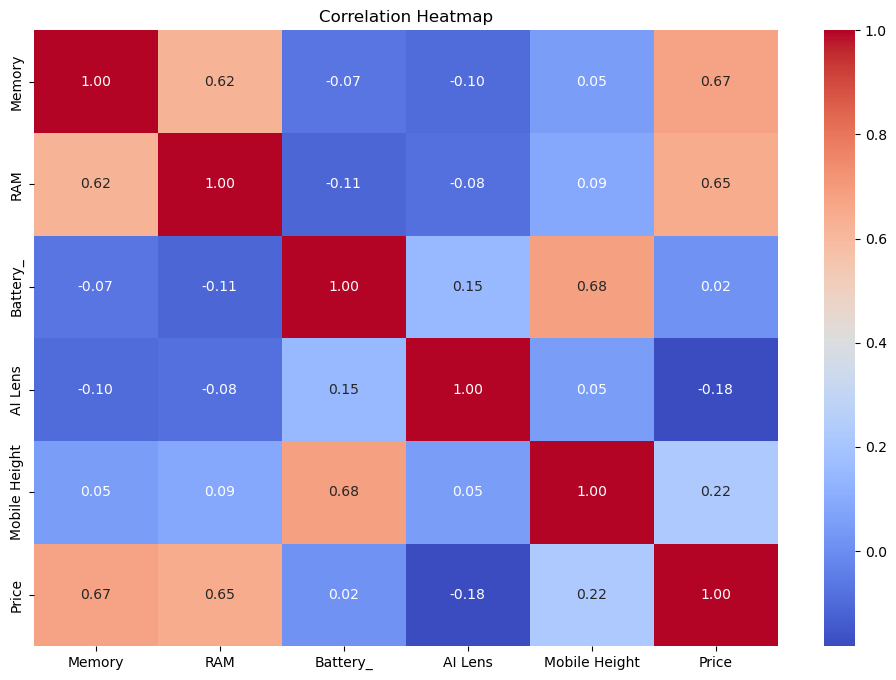

Price            1.000000
Memory           0.672181
RAM              0.647331
Mobile Height    0.222467
Battery_         0.017318
AI Lens         -0.182891
Name: Price, dtype: float64


In [124]:
numeric_data_encoded = data_encoded.select_dtypes(include='number')

correlation = numeric_data_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print(correlation['Price'].sort_values(ascending=False))

- Heatmap is created to visualize the correlation of all numerical columns with the Price column.
- Memory and RAM have the most importance in affecting Price(0.67 and 0.65 respectively). As the values of Memory and RAM increases, Price also increases.

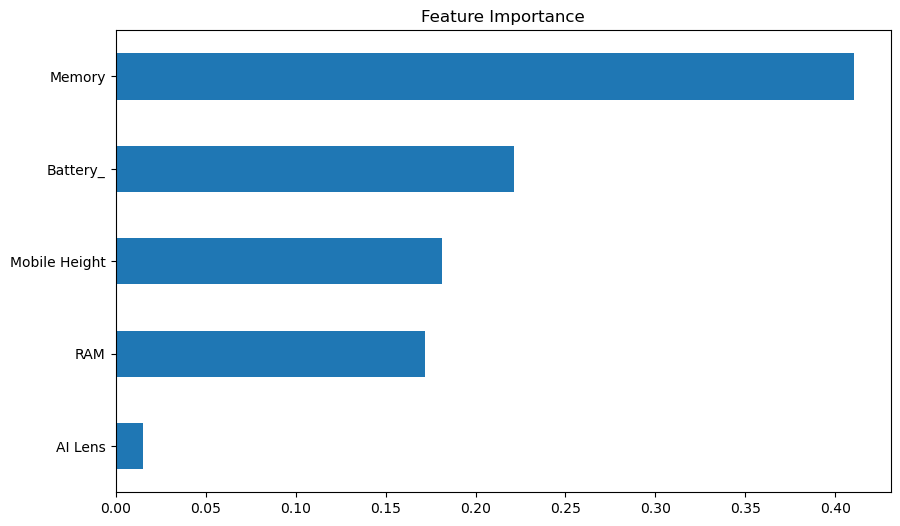

Memory           0.410150
Battery_         0.221335
Mobile Height    0.181111
RAM              0.172034
AI Lens          0.015370
dtype: float64


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = numeric_data_encoded.drop(columns=['Price'])
y = numeric_data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

print(importances.sort_values(ascending=False))

- Importance of features based on model context- Random Forest-
- It shows that how much each feature reduces prediction error across all the trees in the forest. High importance means a feature was frequently used to split data and those splits significantly improved accuracy.
- Memory has highest influence in prediction.
- Battery, Mobile height and RAM have little low influence in predicting.
- AI lens has no influence in prediction.

In [127]:
data_encoded['Rear Camera'] = data_encoded['Rear Camera'].str.replace('mp', '', case=False).str.extract(r'(\d+\.?\d*)').astype(float)
data_encoded['Front Camera'] = data_encoded['Front Camera'].str.replace('mp', '', case=False).str.extract(r'(\d+\.?\d*)').astype(float)

print(data_encoded[['Rear Camera', 'Front Camera']].head())

   Rear Camera  Front Camera
0         13.0           5.0
1         13.0           5.0
2         50.0          16.0
3          8.0           5.0
4         50.0           5.0


- Rear Camera and Front Camera are object columns due to MP mentioned in datapoints.
- MP is removed from all datapoints and columns are converted to float datatype.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

- Importing libraries for model building and prediction.
- sklearn- It provides simple and efficient tools for data mining, machine learning, and model evaluation, built on NumPy, SciPy, and matplotlib.
- Train_test_split- For splitting the dataset into two parts for trainig the model and predicting the model.
- As it is a regression type model,
- Linear Regression- It is a simple and widely used model that fits a linear relationship between independent variables and a continuous target using the least squares method.
- Decision Tree Regressor- It is a non-linear model that predicts continuous target values by learning decision rules from the features, using a tree-like structure to split data into regions with similar output values.
- Random Forest Regressor- It is an ensemble learning model that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting in regression tasks.
- Mean_absolute_error- It is a metric that calculates the average absolute difference between actual and predicted values, providing a straightforward measure of prediction accuracy in regression tasks.
- R2_score- It measures the proportion of variance in the target variable that is explained by the model, indicating the goodness of fit—where 1.0 means perfect prediction and 0.0 means the model does no better than the mean.

In [130]:
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Split the dataset into four parts-
- 1. Training set with input values.
  2. Trainig set with output value.
  3. Testing set with input values.
  4. Testing set with output value.

In [131]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, lr_preds))
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_preds, squared=False))

Linear Regression R²: 0.6086993006348744
Linear Regression RMSE: 5028.110235902314


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Trainig the model on Linear Regression algorithm.

In [133]:
mae = mean_absolute_error(y_test, lr_preds)
rmse = mean_squared_error(y_test, lr_preds, squared=False)
r2 = r2_score(y_test, lr_preds)

print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): ₹3050.20
Root Mean Squared Error (RMSE): ₹5028.11
R² Score: 0.609


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- MAE is 3050, which means on average the difference between actual price and predicted price is Rs 3050.20.
- RMSE is 5028, which means larger errors are higher.
- R2 score is 0.60, which means model is giving 60% corrrect predictions.

In [134]:
#Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, dt_preds))
print("Decision Tree RMSE:", mean_squared_error(y_test, dt_preds, squared=False))

Decision Tree R²: 0.7581660325091074
Decision Tree RMSE: 3952.8299270141365


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Training the model on Decision Tree algorithm.

In [135]:
mae = mean_absolute_error(y_test, dt_preds)
rmse = mean_squared_error(y_test, dt_preds, squared=False)
r2 = r2_score(y_test, dt_preds)

print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): ₹1579.25
Root Mean Squared Error (RMSE): ₹3952.83
R² Score: 0.758


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Average MAE error is very less than linear regression(Rs 1579.25)
- Large errors are also less than linear regression( Rs 3952.83)
- Prediction accuracy is 75.8%.

In [136]:
#Random Forrest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_preds))
print("Random Forest RMSE:", mean_squared_error(y_test, rf_preds, squared=False))

Random Forest R²: 0.820979851233657
Random Forest RMSE: 3400.9514743310365


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Training the model on Random Forest algorithm.

In [137]:
mae = mean_absolute_error(y_test, rf_preds)
rmse = mean_squared_error(y_test, rf_preds, squared=False)
r2 = r2_score(y_test, rf_preds)

print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): ₹1684.32
Root Mean Squared Error (RMSE): ₹3400.95
R² Score: 0.821


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- MAE and RMSE are somewhat similar to decision tree algorithm model.
- Prediction accuracy is far better than decision tree model(82%).

In [138]:
!pip install xgboost --use-pep517

In [139]:
from xgboost import XGBRegressor

- XgBoost- It is an efficient gradient boosting framework for better speed and performance. XGBoost works by building an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones using gradient descent to minimize a specified loss function, resulting in a strong predictive model.

In [141]:
#XG Boost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"XGBoost R² Score: {r2:.3f}")
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost R² Score: 0.835
XGBoost RMSE: 3262.73


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Training the model on XGBoost algorithm.

In [142]:
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): ₹1713.76
Root Mean Squared Error (RMSE): ₹3262.73
R² Score: 0.835


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Mean absolute error is slightly higher than decision tree and random forest.
- RMSE is lower than other algorithms.
- Prediction accuracy is 83.5%.

In [143]:
from sklearn.model_selection import RandomizedSearchCV

- Randomized Search CV- Searches the best options for all parameters for better accuracy and least errors.

In [144]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

- Given values for different parameters to choose from for better accuracy.

In [145]:
xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

- Training model with chosen best values of parameters.

In [146]:
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


- Values of all the parameters used in trainig.

In [147]:
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f"Improved XGBoost R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Improved XGBoost R²: 0.906
MAE: 1408.85
RMSE: 2464.98


C:\Users\ALANKAR\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Improved the accuracy from 83.5% to 90.6%.
- MAE and RMSE are also reduced.